# Week 9 Tutorial

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

In [2]:
! pip install requests

In [4]:
def k_means_clust(img, K, max_iter=10, eps=1.0, attempts = 10, flag=cv.KMEANS_PP_CENTERS):
    """Args
    img: color image (3 channel)
    K = number of clusters
    By default, max_iter=10, eps=1, atempts=10, k-means++"""
    img = img.reshape((-1, 3))
    img = np.float32(img)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, max_iter, eps)
    return cv.kmeans(img, K, None, criteria, attempts, flag)

## Exercise 1

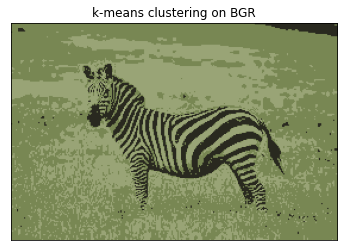

In [5]:
img = cv.imread("images/zebra.jfif")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt_img(img_rgb, "zebra")

ret, label, center = k_means_clust(img_rgb, 3)

center = np.uint8(center)
 
res = center[label.flatten()]
quant = res.reshape(img_rgb.shape)

plt_img(quant, "k-means clustering on BGR")

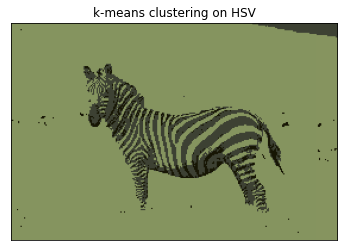

In [6]:
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

ret, label, center = k_means_clust(img_hsv, 3)

center = np.uint8(center)

res = center[label.flatten()]
quant = res.reshape(img_hsv.shape)

# HSV to RGB
quant_rgb = cv.cvtColor(quant, cv.COLOR_HSV2RGB)

plt_img(quant_rgb, "k-means clustering on HSV")

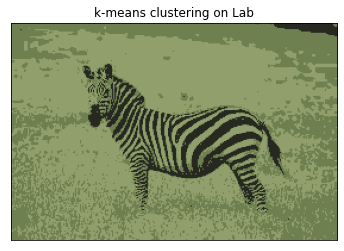

In [7]:
img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)

ret, label, center = k_means_clust(img_lab, 3)

center = np.uint8(center)

res = center[label.flatten()]
quant = res.reshape(img_lab.shape)

# Lab to RGB
quant_rgb = cv.cvtColor(quant, cv.COLOR_Lab2RGB)

plt_img(quant_rgb, "k-means clustering on Lab")

Lab is the most suitable method because the image look cleaner